In [84]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn import metrics
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
import umap

np.set_printoptions(suppress=True)
sns.set_theme(style="ticks", color_codes=True)

datapath = 'C:\\Users\\MrBrito\\Documents\\_Grad_School\\Rotations\\Satra\\egemaps_analysis\\egemaps_vector_both.csv'
egm = pd.read_csv(datapath)#extract all the egemaps data from the csv


def extract_N_scale(dataframe,nFeatures):
    data_unscaled = dataframe.iloc[:,0:nFeatures]#pull sample data for egemap features (there are 88 features)
    labels = dataframe.iloc[:,nFeatures:]#pull metadata for all samples
    data = (data_unscaled-data_unscaled.mean())/data_unscaled.std(ddof=0) #scale. subtract mean and divide by std for each feature
    return data, labels

#Split the data based on diagnosis. norm is 'target'= 0, VFP is 'target' = 1. Just extract vowel data too
egm_Norm = egm[egm['target']== 0]
#egm_VFP = egm[egm['target']== 1]

#Just pull out Vowel data or Speech data using the "token" feature in the data
vow = egm_Norm[egm_Norm["token"].apply(lambda x: 'Vowel' in x)]
#spch = egm_Norm[egm_Norm["token"].apply(lambda x: 'Speech' in x)]

#separate metadata and normalize each dataset
norm_vow_data, labels = extract_N_scale(vow, 88)
#Norm, labels = extract_N_scale(egm_Norm, 88) #does not separate out speech and vowel data

0.3742162756550864

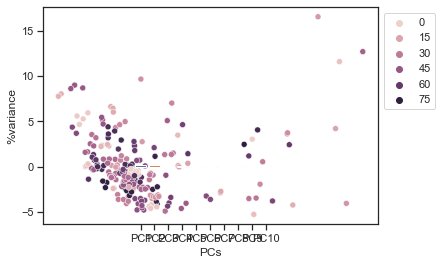

In [118]:
pca = PCA(n_components=88) #create PC object

##scree plot
norm_vow_expvar = pd.DataFrame(pca.fit(norm_vow_data).explained_variance_ratio_) #% of variance of data explained by each PC
norm_vow_expvar['PCs']=['PC' + str(i) for i in np.arange(norm_vow_expvar.index.size)+1]#x axes
norm_vow_expvar.columns= ['%variance', 'PCs']
sns.barplot(x="PCs", y="%variance", data=Exp_Var_NV[0:10])

##shows contribution of each feature to a particular PC
#X = np.arange(88)+1
#Y = pca.components_[:,0]
#fig, ax = plt.subplots()
#sc = plt.scatter(x=X, y=Y)

##project data onto PCs
norm_vow_PCA = pd.DataFrame(pca.fit_transform(norm_vow_data))
norm_vow_PCA.index = labels['sid']

##extract top PCs into a separate dataframe
PCtop = norm_vow_PCA.iloc[:,:2]

##try to plot clusters in 2D as a scatter and a weird topography map that joins clusters
#n=90
#fig, ax = plt.subplots(figsize=(7, 5))
#sns.scatterplot(x=PCtop.iloc[:n,0], y=PCtop.iloc[:n,1], hue=PCtop.index[:n])
#plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.75))
#clust=sns.jointplot(x=PCtop.iloc[:n,0], y=PCtop.iloc[:n,1], hue=PCtop.index[:n],kind="kde", height=5, legend=False)

#3D plot?
#fig = plt.figure(figsize=(7.5, 7.5))
#ax = fig.add_subplot(111, projection = '3d')
#x = PCtop.iloc[:,0]
#y = PCtop.iloc[:,1]
#z = PCtop.iloc[:,2]
#ax.set_xlabel("PC1")
#ax.set_ylabel("PC2")
#ax.set_zlabel("PC2")
#ax.scatter(x, y, z)
#plt.show()

KMean = KMeans(n_clusters=PCtop.index.nunique())
KMean.fit(PCtop)
out = KMean.predict(PCtop)
silPCA = metrics.silhouette_score(PCtop,out)
sns.scatterplot(x=PCtop[0], y=PCtop[1], hue=out)
sns.color_palette('pastel')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.75))
silPCA

0.49152568

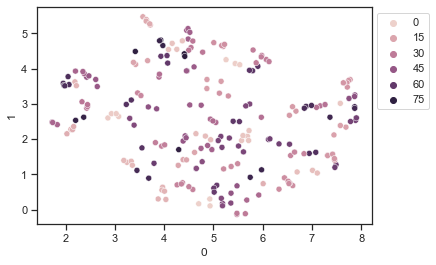

In [120]:
#calculate unsupervised UMAP on the data
reducer=umap.UMAP()
norm_vow_UMAP=pd.DataFrame(reducer.fit_transform(norm_vow_data))
norm_vow_UMAP.index = labels['sid']

KMean = KMeans(n_clusters=norm_vow_UMAP.index.nunique())
KMean.fit(norm_vow_UMAP)
out = KMean.predict(norm_vow_UMAP)
silUMAP = metrics.silhouette_score(norm_vow_UMAP,out)

sns.scatterplot(x=norm_vow_UMAP[0], y=norm_vow_UMAP[1], hue=out)
sns.color_palette('pastel')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.75))

silUMAP

#fig, ax = plt.subplots(figsize=(7.5, 7.5))
#sns.scatterplot(x=embedding[:, 0], y= embedding[:, 1], hue=pca_proj.index[:])
#plt.gca().set_aspect('equal', 'datalim')
#plt.title('UMAP projection of the egemaps dataset', fontsize=18)
#plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.75))

#d=90
#fig, ax = plt.subplots(figsize=(7, 5))
#sns.scatterplot(x=embedding.iloc[:d, 0], y= embedding.iloc[:d, 1], hue=embedding.index[:d])
#plt.gca().set_aspect('equal', 'datalim')
#plt.title('UMAP projection of the egemaps dataset', fontsize=18)
#plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.75))

#clust2=sns.jointplot(x=embedding.iloc[:d, 0], y= embedding.iloc[:d, 1], hue=embedding.index[:d],kind="kde", height=7.5, legend=False)